# Regression Analysis with Movies Data
Data from Kaggle - https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?resource=download&select=movies_metadata.csv

## Correlation & Regression
Correlation between the Budget and Revenue of moviesM

In [1]:
import pandas as pd

In [2]:
movie = pd.read_csv("movies_metadata.csv", low_memory= False)

In [3]:
movie

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
# Convert release_date to datetime format
pd.to_datetime(movie.release_date, errors = "coerce")

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
45461          NaT
45462   2011-11-17
45463   2003-08-01
45464   1917-10-21
45465   2017-06-09
Name: release_date, Length: 45466, dtype: datetime64[ns]

In [ ]:
# set release_date as index and drop the original release_date column
movie = movie.set_index(pd.to_datetime(movie.release_date, errors = "coerce")).drop(columns = ["release_date"])

In [ ]:
# sort the dataframe by index
movie.sort_index(inplace = True)

In [8]:
movie

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
release_date,,,,,,,,,,,,,,,,,,,,,
1874-12-09,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,315946,tt3155794,xx,Passage de Venus,Photo sequence of the rare transit of Venus ov...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}]",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Passage of Venus,False,6.0,19.0
1878-06-14,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,194079,tt2221420,en,Sallie Gardner at a Gallop,Sallie Gardner at a Gallop was one of the earl...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Sallie Gardner at a Gallop,False,6.2,25.0
1883-11-19,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,426903,tt5459794,en,Buffalo Running,Individual photographs of the running of a buf...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Buffalo Running,False,5.4,7.0
1887-08-18,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,159897,tt2075247,xx,Man Walking Around a Corner,The last remaining production of Le Prince's L...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Man Walking Around a Corner,False,4.1,17.0
1888-01-01,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,96882,tt1758563,xx,Accordion Player,The last remaining film of Le Prince's LPCCP T...,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Accordion Player,False,4.4,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,False,NaN,0,[],NaN,438910,tt0810384,ru,Konstruktor krasnogo tsveta -1993,Engineering Red - 1993 Dir: Andrey I. Y. Petr...,...,[],0.0,76.0,[],Released,NaN,Engineering Red,False,6.0,2.0
NaT,False,NaN,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 878, ...",NaN,433711,tt3158690,en,All Superheroes Must Die 2: The Last Superhero,"In a no holds barred documentary, acclaimed jo...",...,[],0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,All Superheroes Must Die 2: The Last Superhero,False,4.0,1.0
NaT,False,NaN,0,[],NaN,335251,tt1883368,en,The Land Where the Blues Began,An exploration of the musical and social origi...,...,[],0.0,0.0,[],Released,NaN,The Land Where the Blues Began,False,0.0,0.0


In [9]:
df = movie.loc[:, ["title", "budget", "revenue"]].copy()

In [10]:
df

,title,budget,revenue
release_date,,,
1874-12-09,Passage of Venus,0,0.0
1878-06-14,Sallie Gardner at a Gallop,0,0.0
1883-11-19,Buffalo Running,0,0.0
1887-08-18,Man Walking Around a Corner,0,0.0
1888-01-01,Accordion Player,0,0.0
...,...,...,...
NaT,Engineering Red,0,0.0
NaT,All Superheroes Must Die 2: The Last Superhero,0,0.0
NaT,The Land Where the Blues Began,0,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45466 entries, 1874-12-09 to NaT
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    45460 non-null  object 
 1   budget   45466 non-null  object 
 2   revenue  45460 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


In [13]:
df.budget = pd.to_numeric(df.budget, errors = "raise")

In [12]:
df.budget = pd.to_numeric(df.budget, errors = "coerce")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45466 entries, 1874-12-09 to NaT
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    45460 non-null  object 
 1   budget   45463 non-null  float64
 2   revenue  45460 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.4+ MB


### Getting and preparing the Data (Part 2) 

In [16]:
df

,title,budget,revenue
release_date,,,
1874-12-09,Passage of Venus,0.0,0.0
1878-06-14,Sallie Gardner at a Gallop,0.0,0.0
1883-11-19,Buffalo Running,0.0,0.0
1887-08-18,Man Walking Around a Corner,0.0,0.0
1888-01-01,Accordion Player,0.0,0.0
...,...,...,...
NaT,Engineering Red,0.0,0.0
NaT,All Superheroes Must Die 2: The Last Superhero,0.0,0.0
NaT,The Land Where the Blues Began,0.0,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45466 entries, 1874-12-09 to NaT
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    45460 non-null  object 
 1   budget   45463 non-null  float64
 2   revenue  45460 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.4+ MB


In [18]:
df.describe()

,budget,revenue
count,4.546300e+04,4.546000e+04
mean,4.224579e+06,1.120935e+07
std,1.742413e+07,6.433225e+07
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,3.800000e+08,2.787965e+09


In [19]:
df.iloc[:, -2:]  = df.iloc[:, -2:] / 1000000

In [20]:
df

,title,budget,revenue
release_date,,,
1874-12-09,Passage of Venus,0.0,0.0
1878-06-14,Sallie Gardner at a Gallop,0.0,0.0
1883-11-19,Buffalo Running,0.0,0.0
1887-08-18,Man Walking Around a Corner,0.0,0.0
1888-01-01,Accordion Player,0.0,0.0
...,...,...,...
NaT,Engineering Red,0.0,0.0
NaT,All Superheroes Must Die 2: The Last Superhero,0.0,0.0
NaT,The Land Where the Blues Began,0.0,0.0


In [ ]:
# Find rows with missing titles
df.loc[df.title.isna()]

,title,budget,revenue
release_date,,,
NaT,NaN,0.0,NaN
NaT,NaN,NaN,NaN
NaT,NaN,0.0,NaN
NaT,NaN,NaN,NaN
NaT,NaN,0.0,NaN
NaT,NaN,NaN,NaN


In [ ]:
# Drop rows with missing values
df.dropna(inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45460 entries, 1874-12-09 to NaT
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    45460 non-null  object 
 1   budget   45460 non-null  float64
 2   revenue  45460 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.4+ MB


In [ ]:
# Check budget value counts for anomalies
df.budget.value_counts()

budget
0.000000     36570
5.000000       286
10.000000      259
20.000000      243
2.000000       242
             ...  
5.005600         1
8.620000         1
0.762241         1
2.791874         1
0.566000         1
Name: count, Length: 1223, dtype: int64

0 is a placeholder for missing values for 36570 movies

In [25]:
df.revenue.value_counts()

revenue
0.000000      38052
12.000000        20
11.000000        19
10.000000        19
2.000000         18
              ...  
66.913939         1
184.770205        1
24.527158         1
9.705840          1
4.219536          1
Name: count, Length: 6863, dtype: int64

for 38052 movies, revenu is zero

In [ ]:
# Remove rows with budget or revenue less than or equal to zero
df = df.loc[(df.revenue > 0) & (df.budget > 0)]

In [27]:
df

,title,budget,revenue
release_date,,,
1915-02-08,The Birth of a Nation,0.100000,11.000000
1915-12-13,The Cheat,0.017311,0.137365
1916-12-24,"20,000 Leagues Under the Sea",0.200000,8.000000
1918-08-01,Mickey,0.250000,8.000000
1921-01-21,The Kid,0.250000,2.500000
...,...,...,...
2017-07-26,Atomic Blonde,30.000000,90.007945
2017-07-28,The Emoji Movie,50.000000,66.913939
2017-08-03,The Dark Tower,60.000000,71.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5381 entries, 1915-02-08 to 2017-08-04
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    5381 non-null   object 
 1   budget   5381 non-null   float64
 2   revenue  5381 non-null   float64
dtypes: float64(2), object(1)
memory usage: 168.2+ KB


In [29]:
df.describe()

,budget,revenue
count,5381.000000,5381.000000
mean,31.094796,90.318123
std,40.162625,166.142264
min,0.000001,0.000001
25%,5.037000,7.011317
50%,17.000000,29.918745
75%,40.000000,99.965753
max,380.000000,2787.965087


In [30]:
df.sort_values("budget", ascending = False)

,title,budget,revenue
release_date,,,
2011-05-14,Pirates of the Caribbean: On Stranger Tides,380.000000,1045.713802
2007-05-19,Pirates of the Caribbean: At World's End,300.000000,961.000000
2015-04-22,Avengers: Age of Ultron,280.000000,1405.403694
2006-06-28,Superman Returns,270.000000,391.081192
2010-11-24,Tangled,260.000000,591.794936
...,...,...,...
2015-12-04,The Letters,0.000001,0.000001
2012-03-30,Aquí Entre Nos,0.000001,2.755584
2003-05-05,Saamy,0.000001,0.000003


In [31]:
df.sort_values("revenue", ascending = False)

,title,budget,revenue
release_date,,,
2009-12-10,Avatar,237.000000,2787.965087
2015-12-15,Star Wars: The Force Awakens,245.000000,2068.223624
1997-11-18,Titanic,200.000000,1845.034188
2012-04-25,The Avengers,220.000000,1519.557910
2015-06-09,Jurassic World,150.000000,1513.528810
...,...,...,...
2003-08-15,Tere Naam,0.000001,0.000002
2015-12-04,The Letters,0.000001,0.000001
1996-10-16,The Wind in the Willows,0.000012,0.000001


In [ ]:
#df.to_csv("bud_vs_rev.csv")

## Covariance and Correlation 
Correlation coefficient ranges from -1 to + 1 <br>
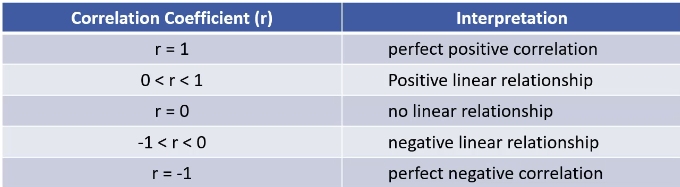

In [33]:
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [35]:
df

,title,budget,revenue
release_date,,,
1915-02-08,The Birth of a Nation,0.100000,11.000000
1915-12-13,The Cheat,0.017311,0.137365
1916-12-24,"20,000 Leagues Under the Sea",0.200000,8.000000
1918-08-01,Mickey,0.250000,8.000000
1921-01-21,The Kid,0.250000,2.500000
...,...,...,...
2017-07-26,Atomic Blonde,30.000000,90.007945
2017-07-28,The Emoji Movie,50.000000,66.913939
2017-08-03,The Dark Tower,60.000000,71.000000


In [36]:
df = df.loc["2016"]

In [37]:
df

,title,budget,revenue
release_date,,,
2016-01-01,Jane Got a Gun,25.0,1.397284
2016-01-07,Friend Request,9.9,2.400000
2016-01-07,The Forest,10.0,40.055439
2016-01-07,Wazir,5.2,9.200000
2016-01-13,13 Hours: The Secret Soldiers of Benghazi,50.0,69.411370
...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40.0,312.242626
2016-12-23,Railroad Tigers,50.0,102.205175
2016-12-23,Dangal,10.4,310.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235 entries, 2016-01-01 to 2016-12-25
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    235 non-null    object 
 1   budget   235 non-null    float64
 2   revenue  235 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.3+ KB


In [39]:
df.describe()

,budget,revenue
count,235.000000,235.000000
mean,40.461695,126.074160
std,51.435816,215.314723
min,0.000500,0.000050
25%,8.500000,5.889868
50%,20.000000,32.000000
75%,45.500000,142.200330
max,250.000000,1153.304495


In [40]:
df.mean(numeric_only=True)

budget      40.461695
revenue    126.074160
dtype: float64

In [41]:
df.var(numeric_only=True)

budget      2645.643127
revenue    46360.429784
dtype: float64

In [42]:
df.cov(numeric_only=True)

,budget,revenue
budget,2645.643127,8861.380845
revenue,8861.380845,46360.429784


In [43]:
df.budget.cov(df.revenue)

np.float64(8861.380845230346)

In [ ]:
# Correlation coefficient matrix
df.corr(numeric_only=True)

,budget,revenue
budget,1.000000,0.800133
revenue,0.800133,1.000000


In [45]:
df.budget.corr(df.revenue)

np.float64(0.8001327462030162)

In [ ]:
# Manual calculation of correlation coefficient
df.budget.cov(df.revenue) / (df.budget.std() * df.revenue.std())

np.float64(0.8001327462030166)

In [47]:
np.cov(df.budget, df.revenue)

array([[ 2645.64312661,  8861.38084523],
       [ 8861.38084523, 46360.42978363]])

In [48]:
np.corrcoef(df.budget, df.revenue)

array([[1.        , 0.80013275],
       [0.80013275, 1.        ]])

### Correlation and Scatterplots

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [51]:
df = df.loc["2016"]

In [52]:
df

,title,budget,revenue
release_date,,,
2016-01-01,Jane Got a Gun,25.0,1.397284
2016-01-07,Friend Request,9.9,2.400000
2016-01-07,The Forest,10.0,40.055439
2016-01-07,Wazir,5.2,9.200000
2016-01-13,13 Hours: The Secret Soldiers of Benghazi,50.0,69.411370
...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40.0,312.242626
2016-12-23,Railroad Tigers,50.0,102.205175
2016-12-23,Dangal,10.4,310.000000


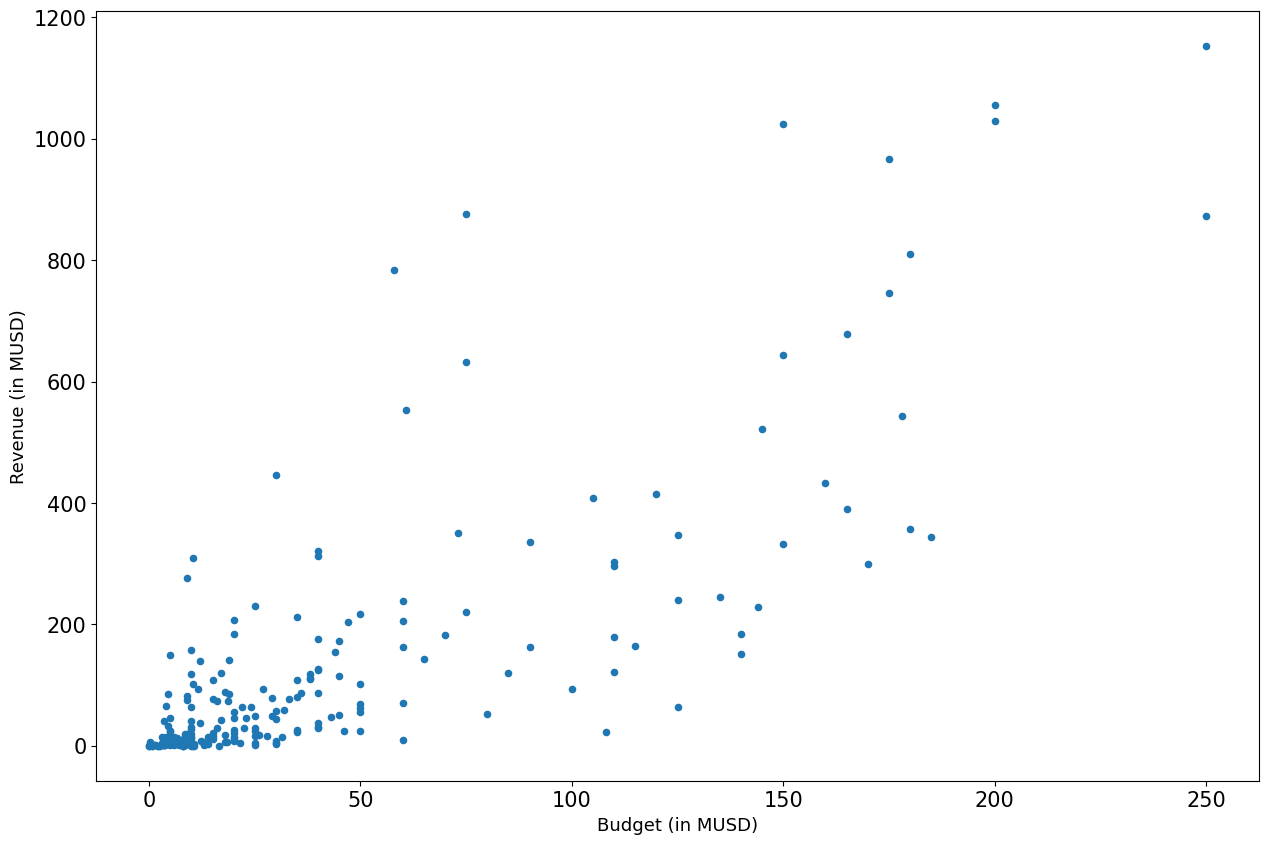

In [53]:
df.plot(kind = "scatter", x = "budget", y = "revenue", figsize = (15, 10), fontsize = 15)
plt.xlabel("Budget (in MUSD)", fontsize = 13)
plt.ylabel("Revenue (in MUSD)", fontsize = 13)
plt.show()

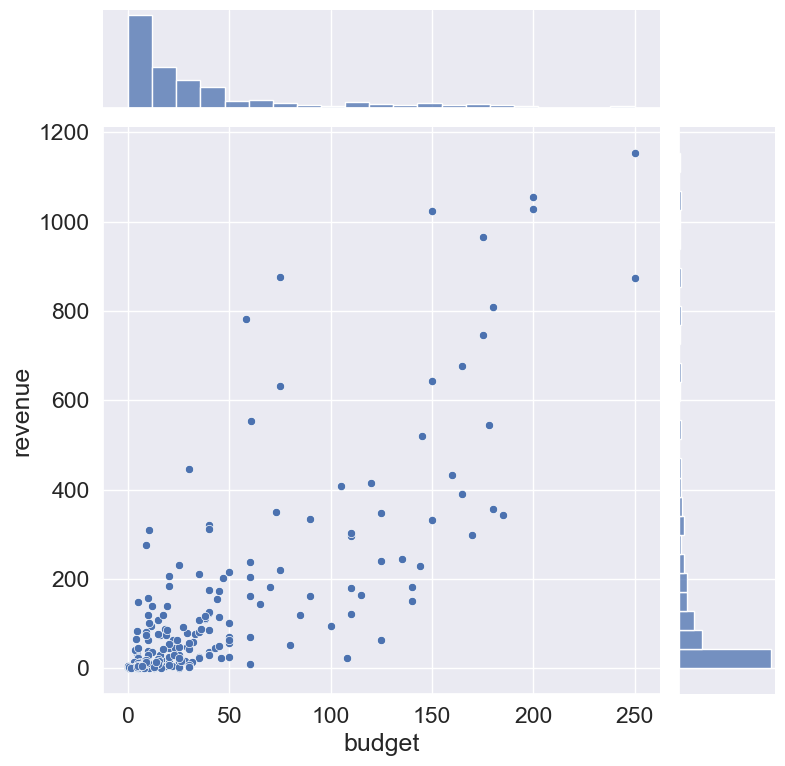

In [54]:
sns.set(font_scale=1.5)
sns.jointplot(data = df, x = "budget", y = "revenue", height = 8)
plt.show()

## Statistical Test

### Creating a Confidence Interval for the Correlation Coefficient (Bootstrapping)

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress= True)

In [56]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [57]:
df = df.loc["2016"]

In [58]:
df

,title,budget,revenue
release_date,,,
2016-01-01,Jane Got a Gun,25.0,1.397284
2016-01-07,Friend Request,9.9,2.400000
2016-01-07,The Forest,10.0,40.055439
2016-01-07,Wazir,5.2,9.200000
2016-01-13,13 Hours: The Secret Soldiers of Benghazi,50.0,69.411370
...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40.0,312.242626
2016-12-23,Railroad Tigers,50.0,102.205175
2016-12-23,Dangal,10.4,310.000000


In [ ]:
# Create a 2D numpy array with budget and revenue columns
array = df.iloc[:, -2:].values
array

array([[  25.  ,    1.4 ],
       [   9.9 ,    2.4 ],
       [  10.  ,   40.06],
       [   5.2 ,    9.2 ],
       [  50.  ,   69.41],
       [  18.  ,   17.06],
       [  40.  ,  124.83],
       [  38.  ,  109.91],
       [  11.5 ,   94.07],
       [  38.  ,  112.34],
       [  10.  ,   64.19],
       [   4.5 ,   32.  ],
       [   3.5 ,    0.62],
       [ 145.  ,  521.17],
       [  80.  ,   52.1 ],
       [   0.3 ,    2.1 ],
       [  20.  ,   21.16],
       [   0.  ,    0.  ],
       [  13.5 ,    3.34],
       [   0.3 ,    2.5 ],
       [  10.  ,   18.73],
       [  28.  ,   16.37],
       [   0.33,    1.6 ],
       [  22.  ,   63.65],
       [  13.  ,    1.65],
       [  50.  ,   55.97],
       [  60.72,  553.81],
       [  58.  ,  783.11],
       [   5.  ,    0.44],
       [ 150.  , 1023.78],
       [  14.  ,    3.62],
       [  18.  ,    6.21],
       [  20.  ,   46.07],
       [  10.72,    2.98],
       [  20.  ,   12.64],
       [   3.5 ,   40.42],
       [   5.  ,   24.8 ],
 

In [60]:
array.shape

(235, 2)

In [61]:
np.corrcoef(array.T)[0, 1]

np.float64(0.8001327462030162)

In [62]:
size = array.shape[0]
size

235

__one bootstrap sample__
Reandomly select 235 movies/obervaitons with replacement 

In [63]:
np.random.seed(123)
indxs = np.random.randint(low = 0, high = size, size = size)

In [64]:
indxs

array([109, 126,  66, 220,  98, 230,  17,  83, 106, 123,  57, 214, 225,
        96, 113, 126,  47,  73,  32, 174, 224, 111, 153,  83,  78, 164,
        96, 208,  68,  49,  55, 195,   2,  84,  39,  66,  84,  47, 189,
       176, 135, 105,  99, 124,  92, 180, 102,  97, 213, 118,  94, 155,
        34, 225,  76, 168, 131, 106,  69,  64,  75, 162,  58, 138,  22,
       205, 146, 228,  15, 155, 158, 180,  70, 109, 115, 154, 208, 134,
        14, 103, 203, 182, 199, 129,  43, 186, 101, 183,  25, 178, 212,
        56,  49,  12,  18, 209,   1,  51, 172, 117, 233,  48,  56, 219,
       177,  86,   3,  67, 139, 149, 217, 103, 233,  98,   3, 139,   3,
       222,   6,   9,  87,  14, 230, 211, 121, 198, 140, 182,  27,  38,
       145, 189, 110,  74,  99, 116,  99, 193,  47,  16, 133, 104, 109,
        86,  46,  15,  59,  40, 153,  45, 177,   0, 163, 157, 129, 211,
        68, 158, 135,  93, 230,  60,  65, 116, 204,  67,  44,  51, 135,
       230,  88, 198, 141, 156, 108,  63,  84, 164, 119, 224, 12

In [65]:
array[indxs]

array([[ 180.  ,  356.74],
       [  18.7 ,   74.  ],
       [  20.  ,   55.03],
       [  30.  ,    2.35],
       [ 200.  , 1028.57],
       [  40.  ,  312.24],
       [   0.  ,    0.  ],
       [ 178.  ,  543.93],
       [   0.52,    1.01],
       [   3.5 ,    3.77],
       [   3.2 ,    4.27],
       [  30.  ,  445.44],
       [ 110.  ,  303.14],
       [   3.5 ,    1.49],
       [  33.  ,   77.07],
       [  18.7 ,   74.  ],
       [  15.  ,  108.29],
       [  16.5 ,    0.02],
       [  20.  ,   46.07],
       [ 125.  ,  346.86],
       [ 125.  ,   64.49],
       [   5.  ,    5.88],
       [  90.  ,  162.36],
       [ 178.  ,  543.93],
       [  73.  ,  349.78],
       [   7.5 ,    9.1 ],
       [   3.5 ,    1.49],
       [   4.3 ,    3.38],
       [  15.  ,   20.57],
       [   4.  ,   13.62],
       [  10.  ,    3.4 ],
       [  17.  ,   42.49],
       [  10.  ,   40.06],
       [   2.  ,    0.34],
       [  23.  ,   46.15],
       [  20.  ,   55.03],
       [   2.  ,    0.34],
 

In [66]:
np.corrcoef(array[indxs].T)[0, 1]

np.float64(0.7981448204332643)

__many bootstrap samples__

In [67]:
sims = 100000

In [68]:
np.random.seed(123)
indxs = np.random.randint(low = 0, high = size, size = size * sims).reshape(sims, size)

In [69]:
indxs.shape

(100000, 235)

In [70]:
indxs

array([[109, 126,  66, ..., 195, 139, 154],
       [ 92, 203, 138, ..., 233, 219,  79],
       [112, 106, 219, ..., 130, 149,  84],
       ...,
       [ 19, 223,   3, ..., 141, 119,  27],
       [ 17, 169,  87, ..., 223, 193, 150],
       [193, 165, 230, ..., 133, 110, 163]], shape=(100000, 235))

In [71]:
corr = []
for i in range(sims):
    corr.append(np.corrcoef(array[indxs[i]].T)[0, 1])

In [72]:
corr

[np.float64(0.7981448204332643),
 np.float64(0.8191044990560746),
 np.float64(0.8237491882953754),
 np.float64(0.7714744355222746),
 np.float64(0.7646349094333266),
 np.float64(0.7458451512909035),
 np.float64(0.7949066424345487),
 np.float64(0.7774860985514475),
 np.float64(0.7870927128777789),
 np.float64(0.7624231378434181),
 np.float64(0.8027592932895113),
 np.float64(0.7317052227235344),
 np.float64(0.7911832825191356),
 np.float64(0.8599378654289733),
 np.float64(0.8050415397815204),
 np.float64(0.7693562131102888),
 np.float64(0.7798866358760899),
 np.float64(0.788317112918505),
 np.float64(0.8110164433562934),
 np.float64(0.7624187786892054),
 np.float64(0.801319333373326),
 np.float64(0.7756331548103326),
 np.float64(0.8425669168496039),
 np.float64(0.6932822250071159),
 np.float64(0.7765961564288452),
 np.float64(0.8075085913817472),
 np.float64(0.8180393205661157),
 np.float64(0.7800613634126948),
 np.float64(0.8044447254360999),
 np.float64(0.8327937148850691),
 np.float64(

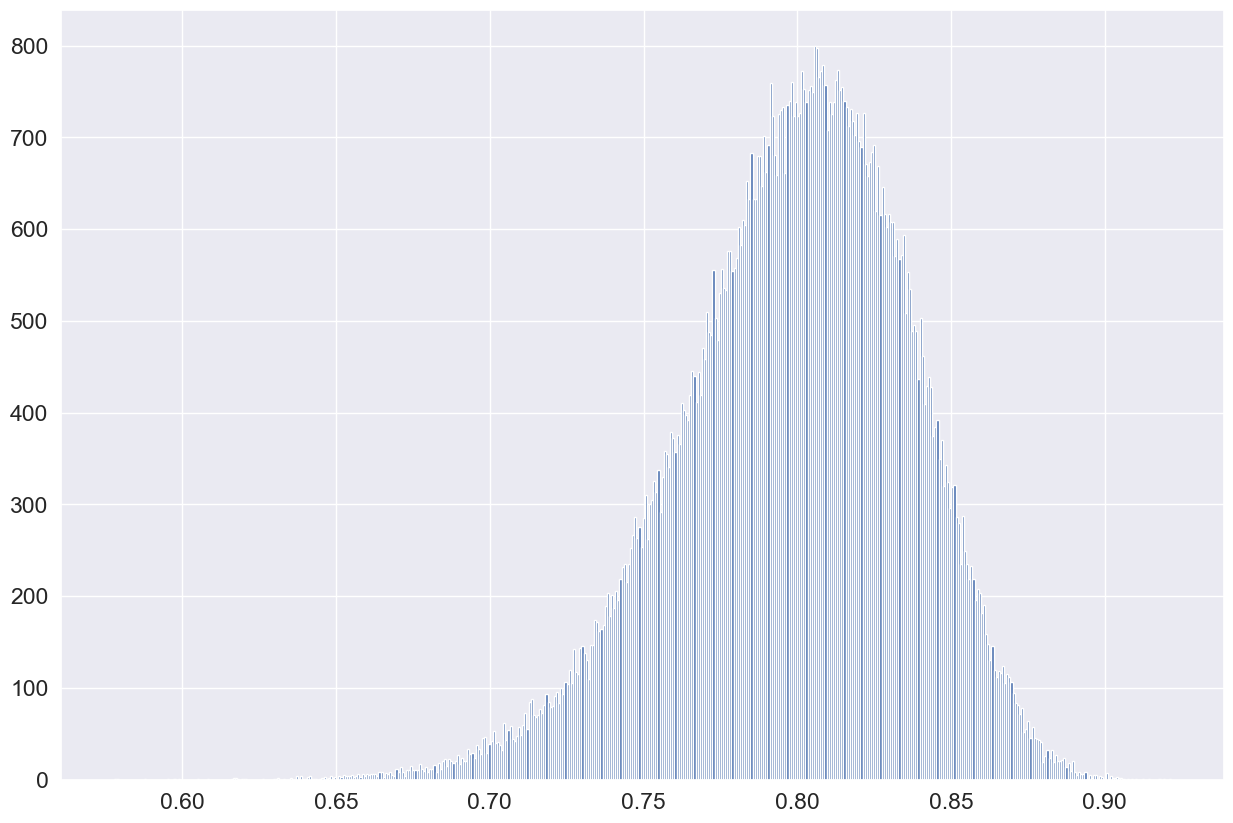

In [73]:
plt.figure(figsize = (15, 10))
plt.hist(corr, bins = 500)
plt.show()

__Minimum correlation coefficient__

In [74]:
np.min(corr)

np.float64(0.5778957658085604)

__95% Confidence Interval Estimate__

In [ ]:
# Calculate the 2.5th and 97.5th percentiles of the correlation coefficients
np.percentile(corr, [2.5, 97.5])

array([0.72, 0.86])

## Hypothesis Test

### Testing for Correlation (t-Test)

Calculate the __Correlation Coefficient__ (r) between __Movie Budgets__ and __Movie Revenues__ (for Movies released in 2016) and __test on a 5% significance level__, whether there is a linear relationship (H0: r == 0). 

In [76]:
import pandas as pd
import scipy.stats as stats

In [77]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [78]:
df = df.loc["2016"]

In [79]:
df

,title,budget,revenue
release_date,,,
2016-01-01,Jane Got a Gun,25.0,1.397284
2016-01-07,Friend Request,9.9,2.400000
2016-01-07,The Forest,10.0,40.055439
2016-01-07,Wazir,5.2,9.200000
2016-01-13,13 Hours: The Secret Soldiers of Benghazi,50.0,69.411370
...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40.0,312.242626
2016-12-23,Railroad Tigers,50.0,102.205175
2016-12-23,Dangal,10.4,310.000000


__H0: r == 0__ <br>
__Ha: r != 0__

In [80]:
r, p_value = stats.pearsonr(df.budget, df.revenue)

In [81]:
r

np.float64(0.8001327462030164)

In [82]:
p_value

np.float64(1.2387431075240917e-53)

### A simple Linear Regression Model with numpy & scipy & seaborn

Create a __simple Linear Regression Model__ with the __independent variable Movie Budget__ and one __dependent variable Movie Revenue__. <br>
Visualize and interpret the __regression coefficients__.

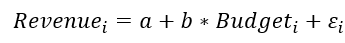

In [83]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=2, suppress= True)

In [84]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [85]:
df = df.loc["2016"]

In [86]:
df

,title,budget,revenue
release_date,,,
2016-01-01,Jane Got a Gun,25.0,1.397284
2016-01-07,Friend Request,9.9,2.400000
2016-01-07,The Forest,10.0,40.055439
2016-01-07,Wazir,5.2,9.200000
2016-01-13,13 Hours: The Secret Soldiers of Benghazi,50.0,69.411370
...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40.0,312.242626
2016-12-23,Railroad Tigers,50.0,102.205175
2016-12-23,Dangal,10.4,310.000000


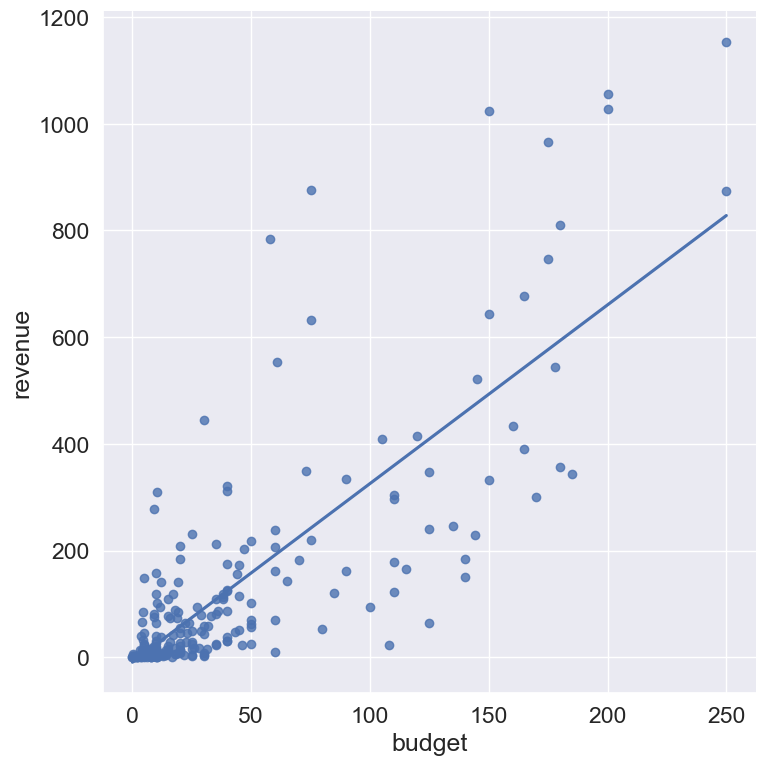

In [87]:
sns.set(font_scale=1.5)
sns.lmplot(data = df, x = "budget", y = "revenue", height = 8, ci = None)
plt.show()

__Linear Regression with numpy__

In [88]:
x = df.iloc[:, -2].values
x

array([ 25.  ,   9.9 ,  10.  ,   5.2 ,  50.  ,  18.  ,  40.  ,  38.  ,
        11.5 ,  38.  ,  10.  ,   4.5 ,   3.5 , 145.  ,  80.  ,   0.3 ,
        20.  ,   0.  ,  13.5 ,   0.3 ,  10.  ,  28.  ,   0.33,  22.  ,
        13.  ,  50.  ,  60.72,  58.  ,   5.  , 150.  ,  14.  ,  18.  ,
        20.  ,  10.72,  20.  ,   3.5 ,   5.  ,  35.  , 140.  ,  23.  ,
         8.  ,  60.  ,   0.  ,   5.21,   6.7 ,  35.  , 110.  ,  15.  ,
        18.5 ,   4.  ,   2.5 ,   2.1 ,  16.  , 250.  ,  18.  ,  10.  ,
         5.  ,   3.2 ,  10.  , 115.  , 175.  ,  29.  ,  20.  ,  31.5 ,
        16.  ,   5.  ,  20.  ,  10.  ,  15.  ,  20.  ,  30.  , 250.  ,
        25.  ,  16.5 ,  35.  ,  10.  ,  29.  ,  30.  ,  73.  ,  27.  ,
        40.  ,   4.  ,  50.  , 178.  ,   2.  ,   9.8 , 160.  , 170.  ,
         3.  , 135.  ,   8.57, 140.  ,  20.  ,  90.  ,   7.  ,   5.07,
         3.5 ,  50.  , 200.  ,   5.98,  75.  , 165.  , 105.  ,   3.  ,
        17.  ,  10.  ,   0.52,  50.  ,  10.  , 180.  ,   5.  ,   5.  ,
      

In [89]:
y = df.iloc[:, -1].values
y

array([   1.4 ,    2.4 ,   40.06,    9.2 ,   69.41,   17.06,  124.83,
        109.91,   94.07,  112.34,   64.19,   32.  ,    0.62,  521.17,
         52.1 ,    2.1 ,   21.16,    0.  ,    3.34,    2.5 ,   18.73,
         16.37,    1.6 ,   63.65,    1.65,   55.97,  553.81,  783.11,
          0.44, 1023.78,    3.62,    6.21,   46.07,    2.98,   12.64,
         40.42,   24.8 ,   25.18,  150.68,   46.15,    0.03,  205.75,
          0.  ,    5.9 ,   12.12,   23.08,  179.25,  108.29,    6.49,
         13.62,    0.23,    0.28,   73.88,  873.26,   88.92,    3.4 ,
         23.51,    4.27,    1.98,  164.6 ,  966.55,   78.64,    8.82,
         14.71,   29.25,    3.22,   55.03,   27.31,   20.57,   14.4 ,
          4.21, 1153.3 ,   48.42,    0.02,  108.76,   15.  ,   48.9 ,
         43.76,  349.78,   93.28,  320.17,   10.9 ,   62.79,  543.93,
          0.34,    2.34,  433.68,  299.37,   14.02,  245.62,    1.98,
        183.35,  207.95,  334.9 ,    1.33,    4.82,    1.49,  216.97,
       1028.57,   14

In [90]:
reg = np.polyfit(x = x, y = y, deg = 1)
reg

array([ 3.35, -9.45])

In [91]:
np.polyfit(x = df.budget, y = df.revenue, deg = 1)

array([ 3.35, -9.45])

In [92]:
X = np.array([min(x), max(x)]) #creating x and y values for regression line

In [93]:
X

array([  0., 250.])

In [94]:
Y = np.polyval(reg, X)

In [95]:
Y

array([ -9.45, 827.91])

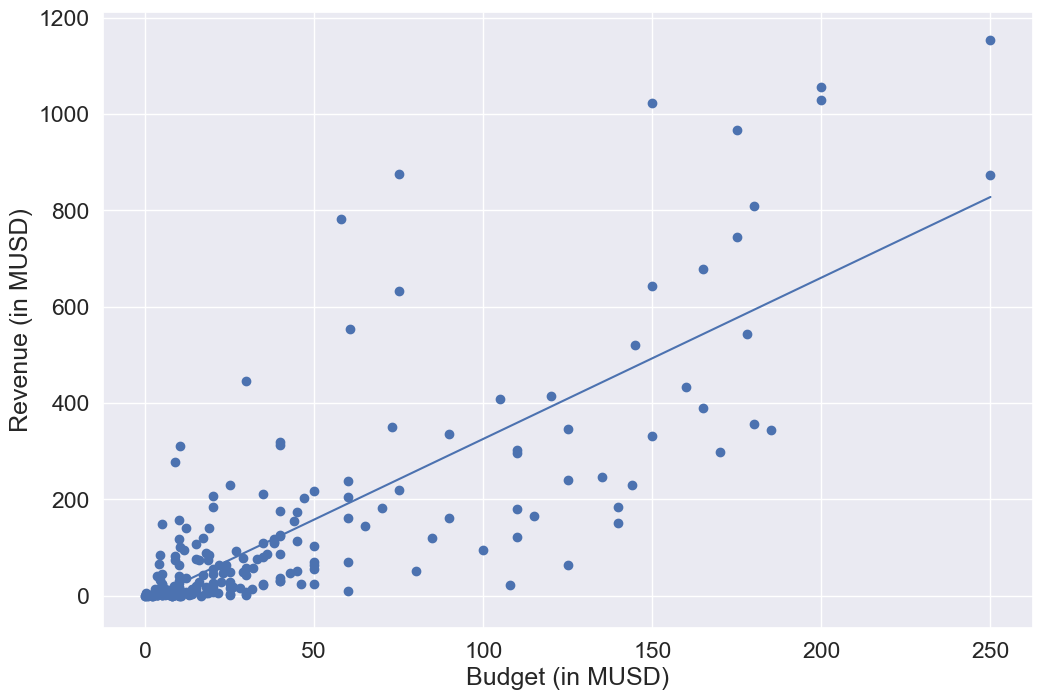

In [96]:
plt.figure(figsize = (12, 8))
plt.plot(X, Y)
plt.scatter(x = x, y = y)
plt.xlabel("Budget (in MUSD)")
plt.ylabel("Revenue (in MUSD)")
plt.show()

__Linear Regression with scipy__

In [97]:
df

,title,budget,revenue
release_date,,,
2016-01-01,Jane Got a Gun,25.0,1.397284
2016-01-07,Friend Request,9.9,2.400000
2016-01-07,The Forest,10.0,40.055439
2016-01-07,Wazir,5.2,9.200000
2016-01-13,13 Hours: The Secret Soldiers of Benghazi,50.0,69.411370
...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40.0,312.242626
2016-12-23,Railroad Tigers,50.0,102.205175
2016-12-23,Dangal,10.4,310.000000


In [98]:
stats.linregress(x = df.budget, y = df.revenue)

LinregressResult(slope=np.float64(3.3494240988498905), intercept=np.float64(-9.449215053886661), rvalue=np.float64(0.8001327462030164), pvalue=np.float64(1.238743107523989e-53), stderr=np.float64(0.16449519793934378), intercept_stderr=np.float64(10.75090807524931))

### How to interpret Regression Coefficients (Intercept and Slope)

In [99]:
stats.linregress(x = df.budget, y = df.revenue)

LinregressResult(slope=np.float64(3.3494240988498905), intercept=np.float64(-9.449215053886661), rvalue=np.float64(0.8001327462030164), pvalue=np.float64(1.238743107523989e-53), stderr=np.float64(0.16449519793934378), intercept_stderr=np.float64(10.75090807524931))

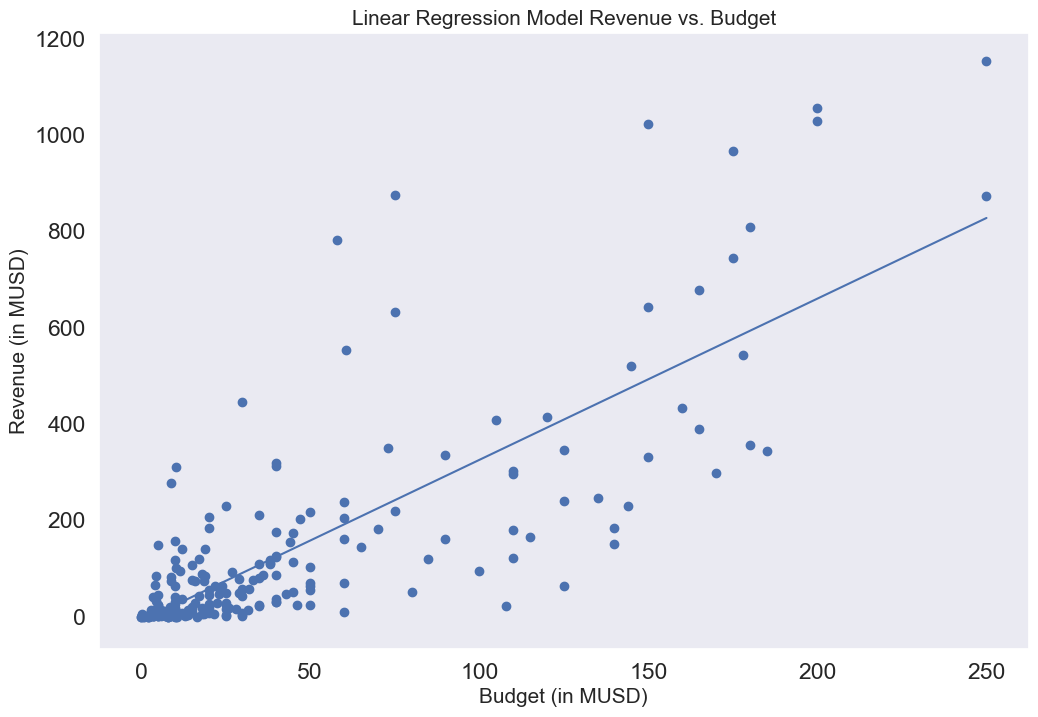

In [100]:
plt.figure(figsize = (12, 8))
plt.plot(X, Y)
plt.grid()
plt.scatter(x = x, y = y)
plt.xlabel("Budget (in MUSD)", fontsize = 15)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.title("Linear Regression Model Revenue vs. Budget", fontsize = 15)
plt.show()

In [101]:
df.budget.cov(df.revenue) / df.budget.var()

np.float64(3.34942409884989)

## Case Study (Part 1): The Market Model (Single Factor Model)

In [102]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [112]:
df = yf.download(["PSKY", "^SP500TR"], start = "2015-12-31", end = "2018-12-31")

[*********************100%***********************]  2 of 2 completed


In [113]:
df

Price           Close                    High                     Low  \
Ticker           PSKY     ^SP500TR       PSKY     ^SP500TR       PSKY   
Date                                                                    
2015-12-31  38.103291  3821.600098  38.418594  3856.370117  37.464597   
2016-01-04  37.715221  3763.989990  37.909253  3811.739990  37.294816   
2016-01-05  37.286736  3771.570068  37.804157  3781.270020  37.149297   
2016-01-06  37.294819  3723.439941  37.893087  3763.550049  36.785481   
2016-01-07  36.656124  3635.290039  37.505019  3714.290039  36.179125   
...               ...          ...        ...          ...        ...   
2018-12-21  36.402161  4802.509766  38.123203  4976.560059  36.183880   
2018-12-24  35.277187  4672.660156  36.452532  4790.000000  35.260396   
2018-12-26  36.410545  4904.490234  36.410545  4904.609863  34.739876   
2018-12-27  36.410545  4946.939941  36.410545  4946.939941  34.907784   
2018-12-28  36.444126  4941.609863  37.023403  5010.160156  36.150291   

Price                         Open                Volume           
Ticker         ^SP500TR       PSKY     ^SP500TR     PSKY ^SP500TR  
Date                                                               
2015-12-31  3821.090088  37.585869  3852.739990  3163600        0  
2016-01-04  3721.040039  37.456511  3811.739990  5456300        0  
2016-01-05  3748.149902  37.674802  3766.080078  4098300        0  
2016-01-06  3702.469971  36.825904  3763.550049  4444300        0  
2016-01-07  3627.320068  36.656124  3714.290039  6308500        0  
...                 ...        ...          ...      ...      ...  
2018-12-21  4787.040039  37.350834  4899.410156  5068200        0  
2018-12-24  4672.660156  35.797697  4770.950195  1921300        0  
2018-12-26  4664.089844  35.461875  4696.629883  4512900        0  
2018-12-27  4766.390137  35.906827  4854.870117  4001900        0  
2018-12-28  4916.640137  36.612033  4967.520020  3553600        0  

[754 rows x 10 columns]

In [114]:
df = df["Close"]

In [115]:
df

Ticker,PSKY,^SP500TR
Date,,
2015-12-31,38.103291,3821.600098
2016-01-04,37.715221,3763.989990
2016-01-05,37.286736,3771.570068
2016-01-06,37.294819,3723.439941
2016-01-07,36.656124,3635.290039
...,...,...
2018-12-21,36.402161,4802.509766
2018-12-24,35.277187,4672.660156
2018-12-26,36.410545,4904.490234


In [116]:
ret = df.pct_change().dropna()

In [117]:
ret

Ticker,PSKY,^SP500TR
Date,,
2016-01-04,-0.010185,-0.015075
2016-01-05,-0.011361,0.002014
2016-01-06,0.000217,-0.012761
2016-01-07,-0.017126,-0.023674
2016-01-08,0.024702,-0.010833
...,...,...
2018-12-21,-0.017671,-0.020588
2018-12-24,-0.030904,-0.027038
2018-12-26,0.032127,0.049614


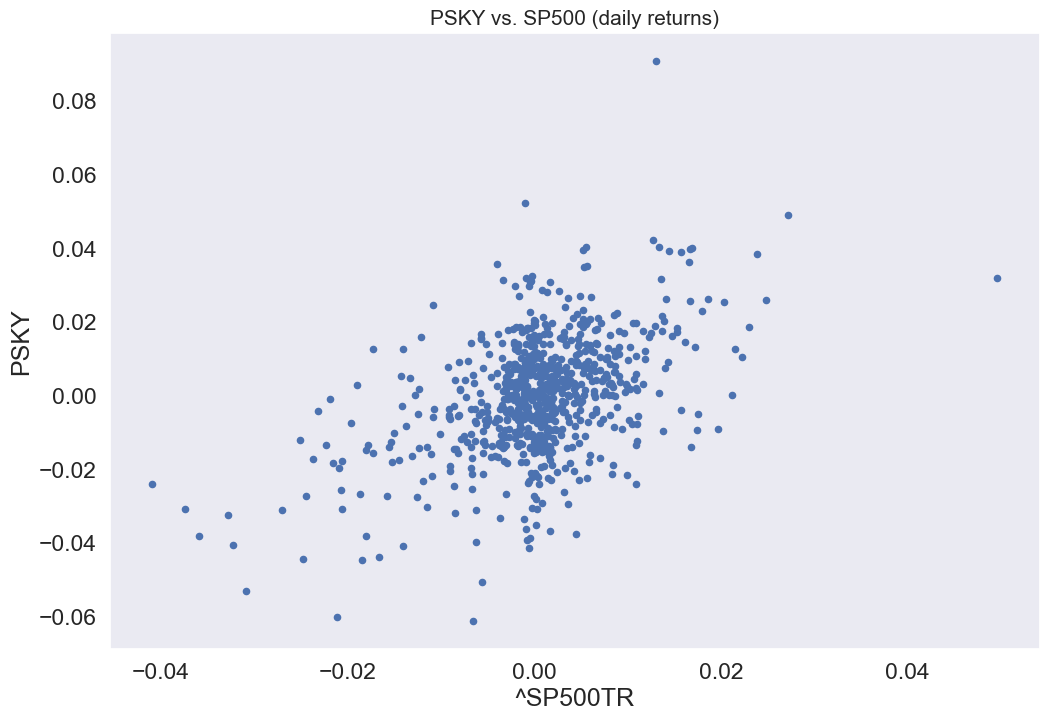

In [118]:
ret.plot(x = "^SP500TR", y = "PSKY", figsize = (12, 8), kind = "scatter")
plt.grid()
plt.title("PSKY vs. SP500 (daily returns)", fontsize = 15)
plt.show()

In [120]:
r, p_value = stats.pearsonr(ret["^SP500TR"], ret["PSKY"])

In [121]:
r

np.float64(0.48131669355987783)

In [122]:
p_value

np.float64(6.364258713002516e-45)

## Case Study (Part 2): The Market Model (Single Factor Model)

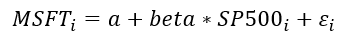

In [124]:
beta, intercept, rvalue, pvalue, stderr = stats.linregress(x = ret["^SP500TR"], y = ret["PSKY"])

In [125]:
beta

np.float64(0.9339223339787941)

In [126]:
intercept

np.float64(-0.00028318715488022525)

In [127]:
rvalue

np.float64(0.481316693559878)

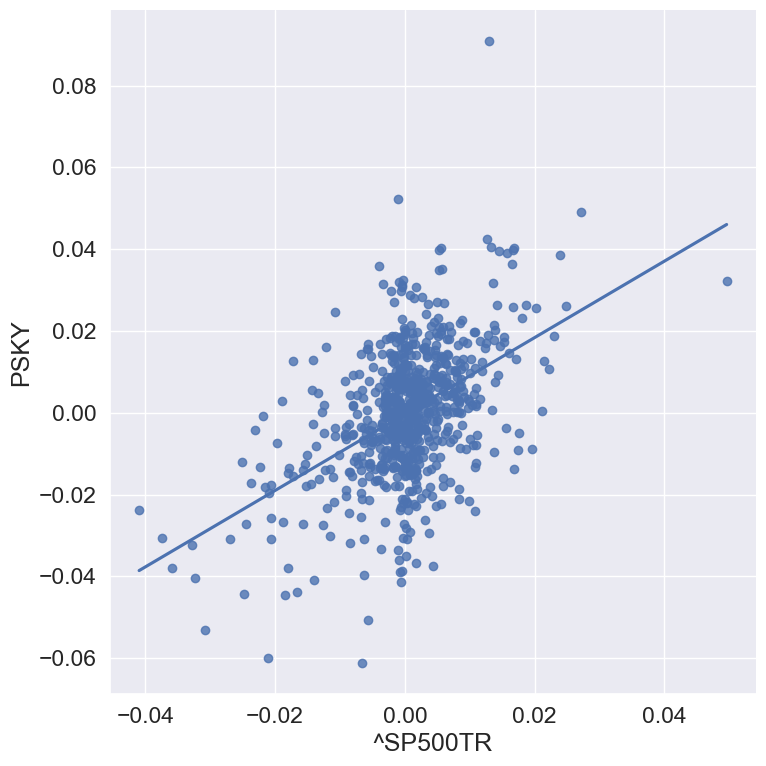

In [129]:
sns.set(font_scale=1.5)
sns.lmplot(data = ret, x = "^SP500TR", y = "PSKY", height = 8, ci = None)
plt.show()